In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [28]:
folder = 'DiodeBC/16pc/'
data_path = os.path.join(scratch, 'sims/', folder)

In [29]:
infile   = os.path.join(data_path, 'metal_uniform.in')
dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

In [30]:
output_folder = os.path.join(fig_path, folder, 'AvgPress/')
os.chdir(output_folder)

In [31]:
list_file = glob.glob("*.h5")

In [32]:
timestep = np.zeros(len(list_file))
avg_press = np.zeros((len(list_file), zrange.shape[0]))
for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep[i] = np.array(hf.get("Timestep")) 
    avg_press[i] = np.array(hf.get("AvgPressure"))
    


Text(0.5, 0, 'Time [Myr]')

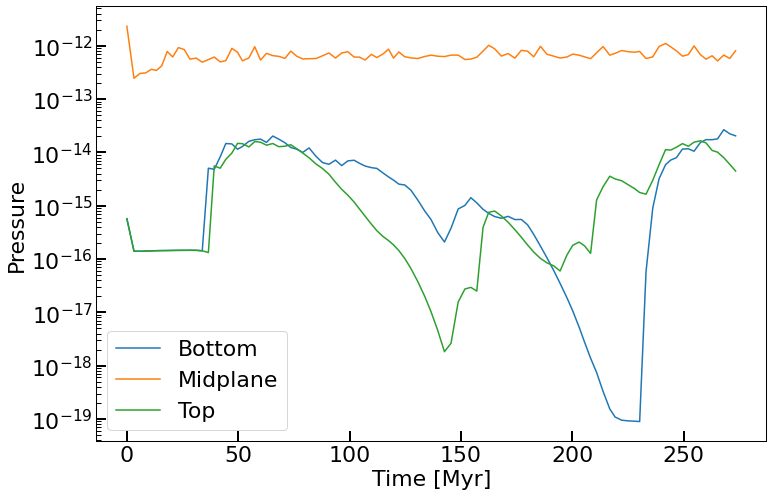

In [57]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-4
index = 0

arr2 = avg_press[:,index]
arr3 = avg_press[:,256]

# Get the indices that would sort the array
indices_sorted = sorted(range(len(timestep)), key=lambda k: timestep[k])

# Sort arr2 based on the sorted order of arr
avgPressure = [arr2[i] for i in indices_sorted]
midPressure = [arr3[i] for i in indices_sorted]

time = sorted(timestep)

ax.plot(time, avgPressure, '-', label='Bottom')
ax.plot(time, midPressure, '-', label='Midplane')


index = -1
arr2 = avg_press[:,index]
indices_sorted = sorted(range(len(timestep)), key=lambda k: timestep[k])
avgPressure = [arr2[i] for i in indices_sorted]
ax.plot(time, avgPressure, '-', label='Top')

ax.legend()
# ax.set_title('z=%d'%(zrange[index]/kpc) + ' kpc')
ax.set_yscale('log')
ax.legend()
ax.set_ylabel("Pressure")
ax.set_xlabel('Time [Myr]')
# ax.set_xlim(0.0,200.)

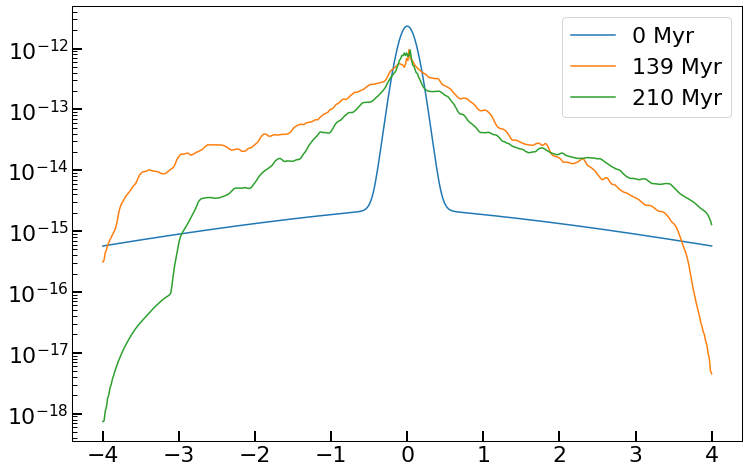

In [65]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))

target=0
index = min(range(len(timestep)), key=lambda i: abs(arr[i] - target))
ax.plot(zrange/kpc, avg_press[index, :], label='%d'%(timestep[index]) + ' Myr')


target=140
index = min(range(len(timestep)), key=lambda i: abs(arr[i] - target))
ax.plot(zrange/kpc, avg_press[index, :], label='%d'%(timestep[index]) + ' Myr')

target=210
index = min(range(len(timestep)), key=lambda i: abs(arr[i] - target))
ax.plot(zrange/kpc, avg_press[index, :], label='%d'%(timestep[index]) + ' Myr')

ax.set_yscale('log')
ax.legend()